In [3]:
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 660198683057344188
 xla_global_id: -1]

In [4]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7134 images belonging to 3 classes.
Found 206 images belonging to 3 classes.


In [5]:

# create model structure
RPS_model = Sequential()

RPS_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
RPS_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Dropout(0.25))

RPS_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Dropout(0.25))

RPS_model.add(Flatten())
RPS_model.add(Dense(1024, activation='relu'))
RPS_model.add(Dropout(0.5))
RPS_model.add(Dense(3, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.1,
#     decay_steps=10000,
#     decay_rate=0.1)
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# RPS_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])
# RPS_model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=lr_schedule), metrics=['accuracy'])
RPS_model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Train the neural network/model
# RPS_model_info = RPS_model.fit_generator(
# RPS_model_info = RPS_model.fit(
#           train_generator,
#         steps_per_epoch=7145 // 64,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=206 // 64)



In [6]:
import matplotlib.pyplot as plt

# Define the number of training epochs
epochs = 100  # Specify the total number of training epochs

# Create empty lists to store training history
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

# Training loop for the specified number of epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch
    history = RPS_model.fit(
        train_generator,
        steps_per_epoch=7145 // 64,  # Adjust based on your batch size
        epochs=1,  # Train for one epoch at a time
        validation_data=validation_generator,
        validation_steps=206 // 64  # Adjust based on your batch size
    )
    
    # Append training metrics to the lists
    train_loss.append(history.history['loss'][0])  # [0] is used to get the value for the current epoch
    val_loss.append(history.history['val_loss'][0])  # [0] is used to get the value for the current epoch
    train_accuracy.append(history.history['accuracy'][0])  # [0] is used to get the value for the current epoch
    val_accuracy.append(history.history['val_accuracy'][0])  # [0] is used to get the value for the current epoch



Epoch 1/100
111/111 [==============================] - 28s 254ms/step - loss: 1.0958 - accuracy: 0.3829 - val_loss: 1.1030 - val_accuracy: 0.3229
Epoch 2/100
111/111 [==============================] - 40s 362ms/step - loss: 1.0931 - accuracy: 0.3812 - val_loss: 1.1080 - val_accuracy: 0.3021
Epoch 3/100
111/111 [==============================] - 45s 400ms/step - loss: 1.0885 - accuracy: 0.3887 - val_loss: 1.1090 - val_accuracy: 0.3281
Epoch 4/100
111/111 [==============================] - 43s 391ms/step - loss: 1.0811 - accuracy: 0.3952 - val_loss: 1.0953 - val_accuracy: 0.3333
Epoch 5/100
111/111 [==============================] - 45s 401ms/step - loss: 1.0645 - accuracy: 0.4232 - val_loss: 1.0470 - val_accuracy: 0.4531
Epoch 6/100
111/111 [==============================] - 44s 399ms/step - loss: 1.0314 - accuracy: 0.4638 - val_loss: 1.0314 - val_accuracy: 0.4688
Epoch 7/100
111/111 [==============================] - 43s 385ms/step - loss: 0.9696 - accuracy: 0.5223 - val_loss: 0.9715 -

Epoch 57/100
111/111 [==============================] - 49s 443ms/step - loss: 0.1564 - accuracy: 0.9174 - val_loss: 1.1789 - val_accuracy: 0.7344
Epoch 58/100
111/111 [==============================] - 48s 434ms/step - loss: 0.1460 - accuracy: 0.9236 - val_loss: 1.1441 - val_accuracy: 0.7240
Epoch 59/100
111/111 [==============================] - 45s 403ms/step - loss: 0.1551 - accuracy: 0.9190 - val_loss: 1.2044 - val_accuracy: 0.7240
Epoch 60/100
111/111 [==============================] - 49s 443ms/step - loss: 0.1470 - accuracy: 0.9226 - val_loss: 1.1959 - val_accuracy: 0.7344
Epoch 61/100
111/111 [==============================] - 48s 436ms/step - loss: 0.1480 - accuracy: 0.9212 - val_loss: 1.3110 - val_accuracy: 0.7135
Epoch 62/100
111/111 [==============================] - 1480s 13s/step - loss: 0.1497 - accuracy: 0.9199 - val_loss: 1.1151 - val_accuracy: 0.7344
Epoch 63/100
111/111 [==============================] - 43s 389ms/step - loss: 0.1563 - accuracy: 0.9158 - val_loss: 1

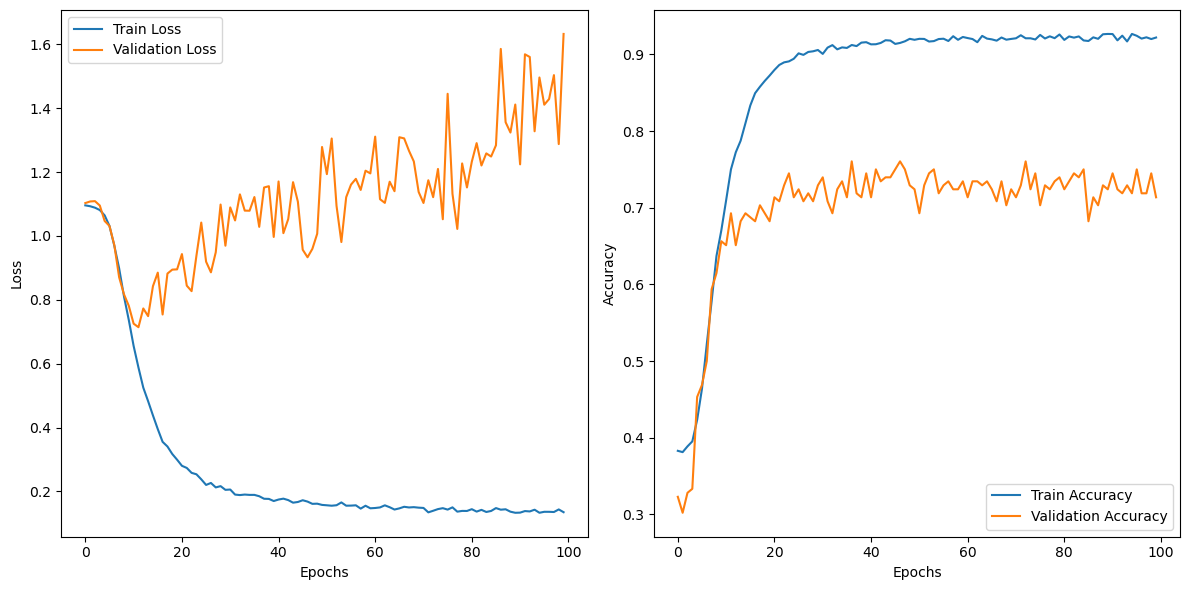

<Figure size 640x480 with 0 Axes>

In [7]:
# After all epochs are completed, draw the chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('training_progress_relu.png')


In [8]:
# save model structure in jason file
model_json = RPS_model.to_json()
with open("RPS_model_relu.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
RPS_model.save_weights('RPS_model_relu.h5')